# TODO:
## CLEANING THE SHIT
### > ~~label everything or start over~~ hahaha
### > ~~each section clearly marked~~
### > ~~the ability to add targets and features with one line of code~~
### > ~~standardized data input (clearly marked)~~
### > make a dot pie version of each [candels,pandas_ta,both]

In [1]:


import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_ta as pta


In [2]:
#data always goes in data
path ='data/'

#d as in directory
d = os.listdir(path)
pd.DataFrame(d,columns=['sheets'])

,sheets
0,"BATS VXX, 15.csv"


In [3]:
d

['BATS VXX, 15.csv']

# STANARD DATA LOADING 
#### `Open` `high` `low` `close` `volume` `date`

In [4]:
sheet = 0
d[sheet]

# loading data
### this part will be replaced by a data loader

df = pd.read_csv(path+d[sheet],index_col='time')
df.index = pd.to_datetime(df.index,unit='s')

df = df[['open','high','low','close','Volume']]
df['date'] = df.index.date
df


,open,high,low,close,Volume,date
time,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,2018-05-22
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2018-05-23
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,2018-05-23
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,2018-05-23
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,2018-05-23
...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,2020-10-28
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,2020-10-28
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,2020-10-28


# From Here On Data Should Look Like that
### doesnt matter if its from downloader or what
#### [datetimeindex open 	high 	low 	close 	Volume 	date] 

# Technical aylisis features

In [5]:
import ta

#df = ta.add_all_ta_features(df,'open','high','low','close','Volume',fillna=True)

# Candels features

In [6]:
df.index

DatetimeIndex(['2018-05-22 19:45:00', '2018-05-23 13:30:00',
               '2018-05-23 13:45:00', '2018-05-23 14:00:00',
               '2018-05-23 14:15:00', '2018-05-23 14:30:00',
               '2018-05-23 14:45:00', '2018-05-23 15:00:00',
               '2018-05-23 15:15:00', '2018-05-23 15:30:00',
               ...
               '2020-10-28 17:30:00', '2020-10-28 17:45:00',
               '2020-10-28 18:00:00', '2020-10-28 18:15:00',
               '2020-10-28 18:30:00', '2020-10-28 18:45:00',
               '2020-10-28 19:00:00', '2020-10-28 19:15:00',
               '2020-10-28 19:30:00', '2020-10-28 19:45:00'],
              dtype='datetime64[ns]', name='time', length=15918, freq=None)

/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/daily_close_compare.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_close'][i] = df['close'][i-1]
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/daily_close_compare.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta'][i]      = (df['close'][i]-df['last_close'][i])/df['last_close'][i]
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/daily_close_compare.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

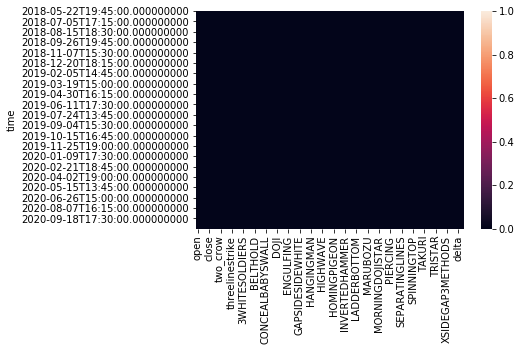

In [7]:
import candle_sticks
import daily_close_compare

# adds all the candel patterns
candle_sticks.all_candels(df)

#adds the daily_close_comparison class i made [which the day checker is not working btw]
df = daily_close_compare.create_anna(df)

#plot empty values... candel sticks dont make any nul values
sns.heatmap(df.isnull())

In [8]:
#pd.set_option('display.max_columns',None)
#df

In [9]:
print(len(df.columns))
df.head()

71


,open,high,low,close,Volume,date,two_crow,three_black_crows,threeinside updown,threelinestrike,...,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.70,34.46,34.64,273953,2018-05-22,0,0,0,0,...,0,0,0,0,0,0,True,None,None,False
2018-05-23 13:30:00,35.60,35.72,35.41,35.50,261600,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,True,34.64,0.0248268,True
2018-05-23 13:45:00,35.54,35.75,35.50,35.59,229753,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:00:00,35.59,35.86,35.27,35.28,302525,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:15:00,35.27,35.50,35.27,35.46,107189,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True


In [10]:
print('length of dataset is:',len(df))
print('length of features is:',len(df.columns))

# you are supposed to have 5 times as many rows as columns at a minmum for ml
five_times_col = len(df.columns)*5
print('maximum features:',five_times_col)

length of dataset is: 15918
length of features is: 71
maximum features: 355


In [11]:
#standardizing data
df = df.rename(columns={'close':'Close',
               'open':'Open',
               'low':'Low',
               'high':'High',
               })
df

,Open,High,Low,Close,Volume,date,two_crow,three_black_crows,threeinside updown,threelinestrike,...,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,2018-05-22,0,0,0,0,...,0,0,0,0,0,0,True,None,None,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,True,34.64,0.0248268,True
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,2018-05-23,0,0,0,0,...,0,0,0,0,0,0,False,34.64,0.0248268,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,2020-10-28,0,0,0,0,...,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,2020-10-28,0,0,0,0,...,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,2020-10-28,0,0,0,0,...,0,0,0,0,0,0,False,24.26,0.06554,True


In [12]:
df = df.drop('date',axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    sdf    = pd.DataFrame(scaled,columns = df.columns)
    sdf.index = df.index
    return sdf

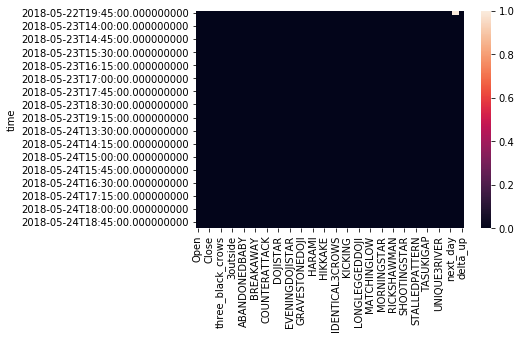

In [14]:
# if there is nulls you want them to be at the beggining 
sns.heatmap(df[:50].isnull())

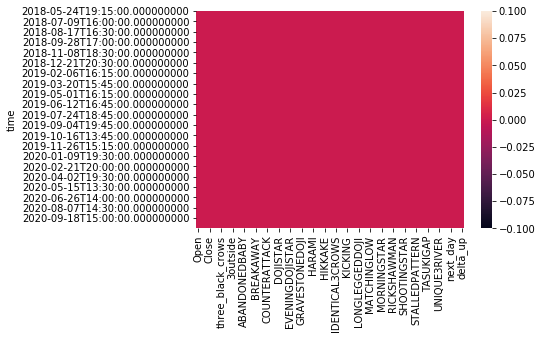

In [15]:
#if there are nulls here SOMTHING IS WRONG and yourleaking data
sns.heatmap(df[50:].isnull())

# Targets

In [16]:
import add_targets

In [17]:
#making the features data a copy so its unaffected by adding targets
fdf = df.copy()

In [18]:
#standard deviation based targets (default is .5,1,2)
tdf ,rhs,ts= add_targets.std_targs(df)
#tdf is for target_df
tdf

these ARE targets!:
 ['Close', 'STDR10:down_target:_2!', 'STDR10:down_target:_1!', 'STDR10:down_target:_0.5!', 'STDR10:up_target:_0.5!', 'STDR10:up_target:_1!', 'STDR10:up_target:_2!']


/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/add_targets.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rollingh] = df.High.rolling(hi_rol_lo).max()
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/add_targets.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rollingl] = df.Low.rolling(hi_rol_lo).min()


,Open,High,Low,Close,Volume,two_crow,three_black_crows,threeinside updown,threelinestrike,3outside,...,STDR10:up_target:_2!,STDR10:down_target:_2!,High_ahead!,Low_ahead!,STDR10:down_target:_2_HIT!,STDR10:down_target:_1_HIT!,STDR10:down_target:_0.5_HIT!,STDR10:up_target:_0.5_HIT!,STDR10:up_target:_1_HIT!,STDR10:up_target:_2_HIT!
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,0,0,0,0,0,...,NaN,NaN,36.15,34.46,False,False,False,False,False,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,0,0,0,0,0,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,0,0,0,0,0,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,0,0,0,0,0,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,0,0,0,0,0,...,NaN,NaN,36.15,35.11,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,0,0,0,0,0,...,28.052749,26.427251,NaN,NaN,False,False,False,False,False,False
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,0,0,0,0,0,...,27.559419,26.420581,NaN,NaN,False,False,False,False,False,False
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,0,0,0,0,0,...,27.639832,26.010168,NaN,NaN,False,False,False,False,False,False


In [19]:
#adding % based targets
tdf = add_targets.add_targets(tdf)
tdf.columns

/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/add_targets.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highlast_10!'] = df['High'].rolling(10).max()
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML -WP- :15MIN/ML_WARPATH-V1.5/add_targets.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lowlast_10!'] = df['Low'].rolling(10).min()


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'two_crow',
       'three_black_crows', 'threeinside updown', 'threelinestrike',
       '3outside', '3starsinsouth', '3WHITESOLDIERS', 'ABANDONEDBABY',
       'ADVANCEBLOCK', 'BELTHOLD', 'BREAKAWAY', 'CLOSINGMARUBOZU',
       'CONCEALBABYSWALL', 'COUNTERATTACK', 'DARKCLOUDCOVER', 'DOJI',
       'DOJISTAR', 'DRAGONFLYDOJI', 'ENGULFING', 'EVENINGDOJISTAR',
       'EVENINGSTAR', 'GAPSIDESIDEWHITE', 'GRAVESTONEDOJI', 'HAMMER',
       'HANGINGMAN', 'HARAMI', 'HARAMICROSS', 'HIGHWAVE', 'HIKKAKE',
       'HIKKAKEMOD', 'HOMINGPIGEON', 'IDENTICAL3CROWS', 'INNECK',
       'INVERTEDHAMMER', 'KICKING', 'KICKINGBYLENGTH', 'LADDERBOTTOM',
       'LONGLEGGEDDOJI', 'LONGLINE', 'MARUBOZU', 'MATCHINGLOW', 'MATHOLD',
       'MORNINGDOJISTAR', 'MORNINGSTAR', 'ONNECK', 'PIERCING', 'RICKSHAWMAN',
       'RISEFALL3METHODS', 'SEPARATINGLINES', 'SHOOTINGSTAR', 'SHORTLINE',
       'SPINNINGTOP', 'STALLEDPATTERN', 'STICKSANDWICH', 'TAKURI', 'TASUKIGAP',
       'TH

In [20]:
pd.set_option('display.max_columns',None)

In [21]:
tdf

,Open,High,Low,Close,Volume,two_crow,three_black_crows,threeinside updown,threelinestrike,3outside,3starsinsouth,3WHITESOLDIERS,ABANDONEDBABY,ADVANCEBLOCK,BELTHOLD,BREAKAWAY,CLOSINGMARUBOZU,CONCEALBABYSWALL,COUNTERATTACK,DARKCLOUDCOVER,DOJI,DOJISTAR,DRAGONFLYDOJI,ENGULFING,EVENINGDOJISTAR,EVENINGSTAR,GAPSIDESIDEWHITE,GRAVESTONEDOJI,HAMMER,HANGINGMAN,HARAMI,HARAMICROSS,HIGHWAVE,HIKKAKE,HIKKAKEMOD,HOMINGPIGEON,IDENTICAL3CROWS,INNECK,INVERTEDHAMMER,KICKING,KICKINGBYLENGTH,LADDERBOTTOM,LONGLEGGEDDOJI,LONGLINE,MARUBOZU,MATCHINGLOW,MATHOLD,MORNINGDOJISTAR,MORNINGSTAR,ONNECK,PIERCING,RICKSHAWMAN,RISEFALL3METHODS,SEPARATINGLINES,SHOOTINGSTAR,SHORTLINE,SPINNINGTOP,STALLEDPATTERN,STICKSANDWICH,TAKURI,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up,STD,STDR10:up_target:_0.5!,STDR10:down_target:_0.5!,STDR10:up_target:_1!,STDR10:down_target:_1!,STDR10:up_target:_2!,STDR10:down_target:_2!,High_ahead!,Low_ahead!,STDR10:down_target:_2_HIT!,STDR10:down_target:_1_HIT!,STDR10:down_target:_0.5_HIT!,STDR10:up_target:_0.5_HIT!,STDR10:up_target:_1_HIT!,STDR10:up_target:_2_HIT!,plus_10!,minus_10!,plus_20!,minus_20!,minus_5!,plus_5!,Highlast_10!,Lowlast_10!,uped_10!,downed_10!,uped_20!,downed_20!,uped_5!,downed_5!
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,34.46,False,False,False,False,False,False,38.1700,31.014,41.640,27.568,32.7370,36.43500,36.15,34.46,False,False,False,False,False,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,34.64,0.0248268,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,35.14,False,False,False,False,False,False,39.2920,31.869,42.864,28.328,33.6395,37.50600,36.15,35.14,False,False,False,False,False,False
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,35.14,False,False,False,False,False,False,39.3250,31.950,42.900,28.400,33.7250,37.53750,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,35.14,False,False,False,False,False,False,39.4460,31.743,43.032,28.216,33.5065,37.65300,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,35.11,False,False,False,False,False,False,39.0500,31.743,42.600,28.216,33.5065,37.27500,36.15,35.11,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,24.26,0.06554,True,0.246374,27.683187,26.796813,27.806374,26.673626,28.052749,26.427251,NaN,NaN,False,False,False,False,False,False,30.3160,24.228,33.072,21.536,25.5740,28.93800,NaN,NaN,False,

### It should contain nulls

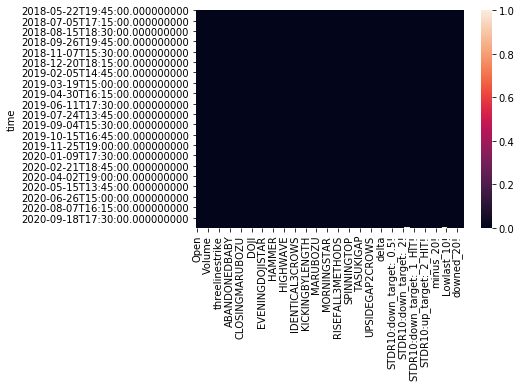

In [22]:
sns.heatmap(tdf.isnull())

### Check the first 50

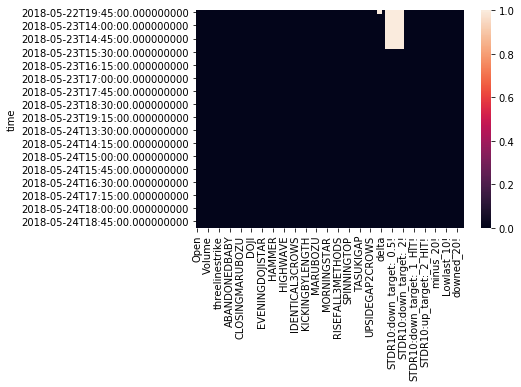

In [23]:
sns.heatmap(tdf[:50].isnull())

### Check the last 50

15900
15900


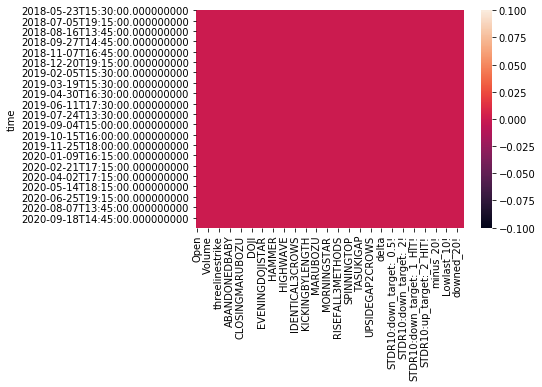

In [24]:
tdf = tdf.dropna(axis=0)
print(len(tdf))
sns.heatmap(tdf.isnull())
print(len(tdf))

In [25]:
#but now there are differnces in the legnths
print(len(tdf),len(fdf))

15900 15918


In [26]:
#so use the index as a cookie cutter template to have the exact same values
fdf = fdf.T[tdf.T.columns].T
print('target_len',len(tdf))

print( 'feature_len',len(fdf))

target_len 15900
feature_len 15900


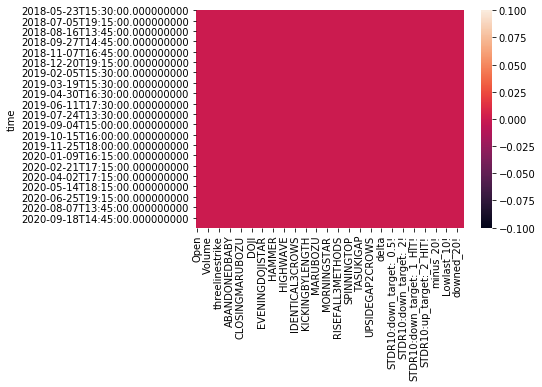

In [27]:
sns.heatmap(tdf.isnull())

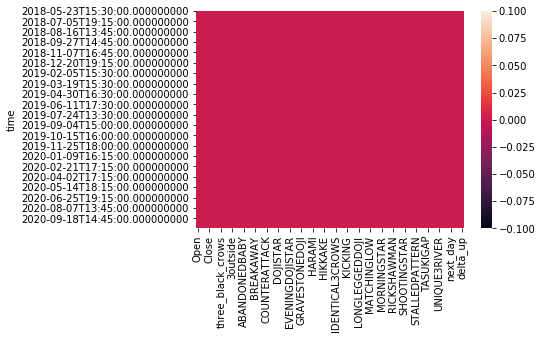

In [28]:

sns.heatmap(fdf.isnull())

# scale

In [29]:
sdf = scale(fdf)


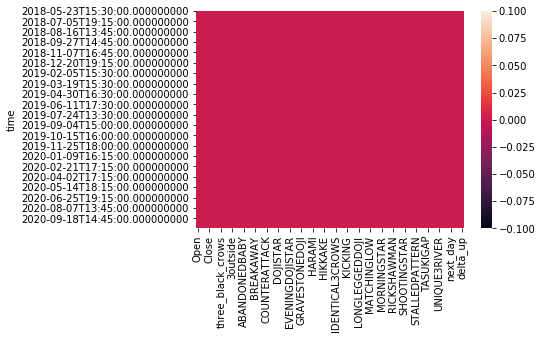

In [30]:
sns.heatmap(sdf.isnull())

# Save Clean Parsed Data

In [31]:
#create the clean data_path if it doesnt already exist
cpath = 'clean_data/'
if not os.path.exists(cpath):
    os.mkdir(cpath)

#name em
tname = 'targets_'+d[sheet]
fname = 'features_'+d[sheet]
sname = 'scaled_'+d[sheet]


#save em
tdf.to_csv(cpath+tname)
fdf.to_csv(cpath+fname)
sdf.to_csv(cpath+sname)

## what if i try to predict its favorite movin avg cross over?


# this is the candel script

# this sheet creates features and cleans data
## GOALS  of this research project 
### >anylize coeficaints on features which work best 
#### `pandas_ta` `candels` `homebrew`
### > create feature scripts that can run in shell_scripts for data downloaders

t sheet
## this should be iterable for the sheets in the dir

sheet = 0
for sheet in range(0,len(d)):
    

    # candels

    import candle_sticks
    import daily_close_compare

    df = daily_close_compare.create_anna(df)

    candle_sticks.all_candels(df)

    df = df.dropna(axis=0)
    sns.heatmap(df.isnull())

    cpath = 'clean_data/'
    if not os.path.exists(cpath):
        print('chayyyayyayya')
        os.mkdir(cpath)

    if 'date' in df.columns:
        df = df.drop('date',axis=1)

    name = d[sheet]
    name = name.split('.')[0].replace(' ','_').replace(',','') +'_candels.csv'
    name


    df.to_csv(cpath+name)

In [32]:
fdf

,Open,High,Low,Close,Volume,two_crow,three_black_crows,threeinside updown,threelinestrike,3outside,3starsinsouth,3WHITESOLDIERS,ABANDONEDBABY,ADVANCEBLOCK,BELTHOLD,BREAKAWAY,CLOSINGMARUBOZU,CONCEALBABYSWALL,COUNTERATTACK,DARKCLOUDCOVER,DOJI,DOJISTAR,DRAGONFLYDOJI,ENGULFING,EVENINGDOJISTAR,EVENINGSTAR,GAPSIDESIDEWHITE,GRAVESTONEDOJI,HAMMER,HANGINGMAN,HARAMI,HARAMICROSS,HIGHWAVE,HIKKAKE,HIKKAKEMOD,HOMINGPIGEON,IDENTICAL3CROWS,INNECK,INVERTEDHAMMER,KICKING,KICKINGBYLENGTH,LADDERBOTTOM,LONGLEGGEDDOJI,LONGLINE,MARUBOZU,MATCHINGLOW,MATHOLD,MORNINGDOJISTAR,MORNINGSTAR,ONNECK,PIERCING,RICKSHAWMAN,RISEFALL3METHODS,SEPARATINGLINES,SHOOTINGSTAR,SHORTLINE,SPINNINGTOP,STALLEDPATTERN,STICKSANDWICH,TAKURI,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-23 15:30:00,35.56,35.67,35.45,35.46,100691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 15:45:00,35.45,35.46,35.14,35.46,156121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 16:00:00,35.44,35.47,35.21,35.3,134606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 16:15:00,35.3,35.51,35.3,35.49,148178,0,0,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 16:30:00,35.48,35.49,35.11,35.16,119606,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 16:30:00,26.63,26.76,26.35,26.69,199248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 16:45:00,26.72,26.96,26.66,26.89,174435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 17:00:00,26.9,27.42,26.9,27.37,240373,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,24.26,0.06554,True


# this sheet creates features and cleans data
## GOALS  of this research project 
### >anylize coeficaints on features which work best 
#### `pandas_ta` `candels` `homebrew`
### > create feature scripts that can run in shell_scripts for data downloaders


import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


path ='../../data/'

d = os.listdir(path)
pd.DataFrame(d,columns=['sheets'])

# selecgt sheet
## this should be iterable for the sheets in the dir

sheet = 0
d[sheet]

# loading data
### this part will be replaced by a data loader

df = pd.read_csv(path+d[sheet],index_col='time')
df.index = pd.to_datetime(df.index,unit='s')

df = df[['open','high','low','close']]
df['date'] = df.index

# candels

import candle_sticks
import daily_close_compare

df = daily_close_compare.create_anna(df)

candle_sticks.all_candels(df)

df = df.dropna(axis=0)
sns.heatmap(df.isnull())

cpath = 'clean_data/'
if not os.path.exists(cpath):
    print('chayyyayyayya')
    os.mkdir(cpath)

if 'date' in df.columns:
    df = df.drop('date',axis=1)

name = d[sheet]
name = name.split('.')[0].replace(' ','_').replace(',','') +'_candels.csv'
name


df.to_csv(cpath+name)

# its possible the scale was fucking up so bad b/c its index was not properly called...